In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.datasets import make_classification
#import seaborn as sns

In [2]:
# Load the dataset
bank_data = pd.read_csv('bank-additional-full.csv', delimiter = ';')

In [3]:
bank_data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
bank_data[['marital']].value_counts().sort_index()

marital 
divorced     4612
married     24928
single      11568
unknown        80
dtype: int64

In [6]:
bank_data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
# Separate features and target
X = bank_data.drop('y', axis=1)
y = bank_data['y'].map({'no': 0, 'yes': 1})

In [8]:
# Encode categorical variables
categorical_cols = X.select_dtypes(include=['object']).columns
X[categorical_cols] = X[categorical_cols].apply(lambda x: x.astype('category').cat.codes)


In [9]:
# Split into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [10]:
# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
# Make predictions on train, validation, and test sets
train_preds = model.predict(X_train)
val_preds = model.predict(X_val)
test_preds = model.predict(X_test)

In [12]:
# Evaluate on various metrics
print('Train set performance:')
print(f'Accuracy: {accuracy_score(y_train, train_preds):.4f}')
print(f'Precision: {precision_score(y_train, train_preds):.4f}')
print(f'Recall: {recall_score(y_train, train_preds):.4f}')
print(f'F1-score: {f1_score(y_train, train_preds):.4f}')
print(f'ROC AUC: {roc_auc_score(y_train, train_preds):.4f}')

print('\nValidation set performance:')
print(f'Accuracy: {accuracy_score(y_val, val_preds):.4f}')
print(f'Precision: {precision_score(y_val, val_preds):.4f}')
print(f'Recall: {recall_score(y_val, val_preds):.4f}')
print(f'F1-score: {f1_score(y_val, val_preds):.4f}')
print(f'ROC AUC: {roc_auc_score(y_val, val_preds):.4f}')

print('\nTest set performance:')
print(f'Accuracy: {accuracy_score(y_test, test_preds):.4f}')
print(f'Precision: {precision_score(y_test, test_preds):.4f}')
print(f'Recall: {recall_score(y_test, test_preds):.4f}')
print(f'F1-score: {f1_score(y_test, test_preds):.4f}')
print(f'ROC AUC: {roc_auc_score(y_test, test_preds):.4f}')

Train set performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
ROC AUC: 1.0000

Validation set performance:
Accuracy: 0.9143
Precision: 0.6492
Recall: 0.5189
F1-score: 0.5768
ROC AUC: 0.7417

Test set performance:
Accuracy: 0.9120
Precision: 0.6404
Recall: 0.5123
F1-score: 0.5692
ROC AUC: 0.7377


In [13]:
test_probs = model.predict_proba(X_test)[:, 1]

In [14]:
# Calculate false positive rates and true positive rates
fpr, tpr, thresholds = roc_curve(y_test, test_probs)

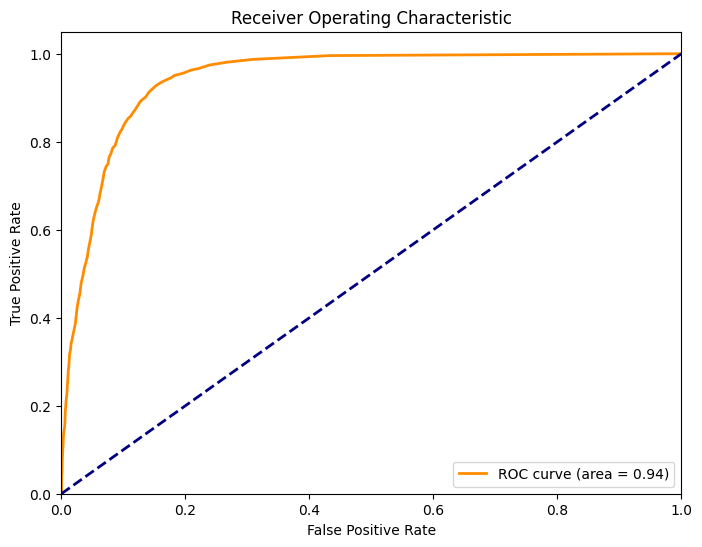

In [15]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, test_probs))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [16]:
# Evaluation metrics for the test set
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC AUC']
values = [accuracy_score(y_test, test_preds),
          precision_score(y_test, test_preds),
          recall_score(y_test, test_preds),
          f1_score(y_test, test_preds),
          roc_auc_score(y_test, test_preds)]


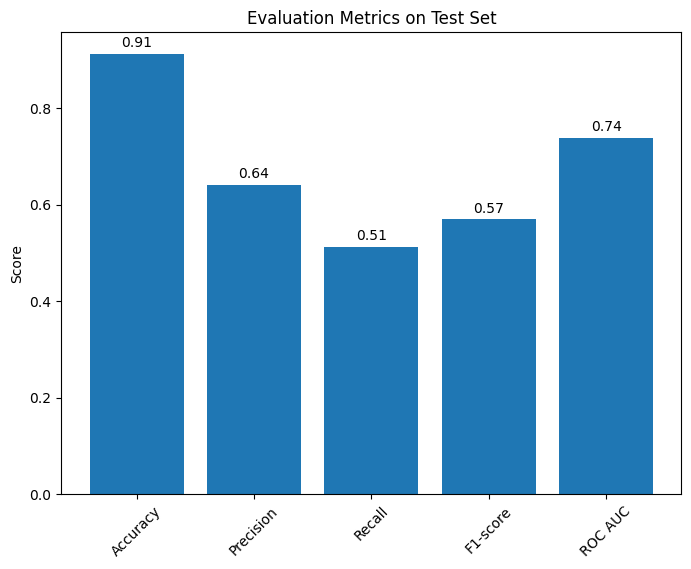

In [17]:
# Set up the figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Create the bar chart
x = np.arange(len(metrics))
bars = ax.bar(x, values)

# Add data labels
for bar in bars:
    height = bar.get_height()
    ax.annotate('{:.2f}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')
# Add labels and title
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylabel('Score')
ax.set_title('Evaluation Metrics on Test Set')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()

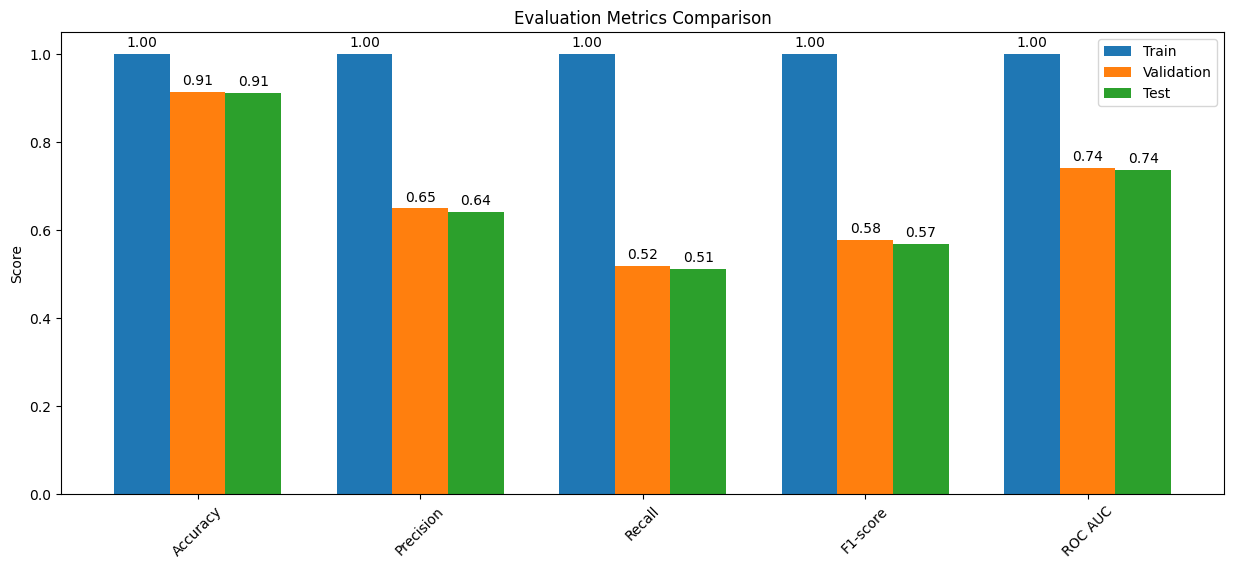

In [18]:
# Evaluation metrics for train, validation, and test sets
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC AUC']
train_values = [accuracy_score(y_train, train_preds),
                precision_score(y_train, train_preds),
                recall_score(y_train, train_preds),
                f1_score(y_train, train_preds),
                roc_auc_score(y_train, train_preds)]

val_values = [accuracy_score(y_val, val_preds),
              precision_score(y_val, val_preds),
              recall_score(y_val, val_preds),
              f1_score(y_val, val_preds),
              roc_auc_score(y_val, val_preds)]

test_values = [accuracy_score(y_test, test_preds),
               precision_score(y_test, test_preds),
               recall_score(y_test, test_preds),
               f1_score(y_test, test_preds),
               roc_auc_score(y_test, test_preds)]

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(15, 6))

# Set the bar width and positions
bar_width = 0.25
x = np.arange(len(metrics))

# Create the bars
bars1 = ax.bar(x - bar_width, train_values, bar_width, label='Train')
bars2 = ax.bar(x, val_values, bar_width, label='Validation')
bars3 = ax.bar(x + bar_width, test_values, bar_width, label='Test')

# Add data labels
for bars, values in zip([bars1, bars2, bars3], [train_values, val_values, test_values]):
    for bar, value in zip(bars, values):
        height = bar.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

# Add labels and title
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylabel('Score')
ax.set_title('Evaluation Metrics Comparison')
ax.legend()

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [19]:
# Define the models
models = {
    'Linear SVC': LinearSVC(dual='auto', max_iter=10000),
     'Logistic Regression': LogisticRegression(solver='saga', max_iter=10000),
    'Naive Bayes': GaussianNB(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Random Forest': RandomForestClassifier()
}

In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


cv_scores = {}
for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=5, scoring='roc_auc', n_jobs=-1)
    cv_scores[name] = scores

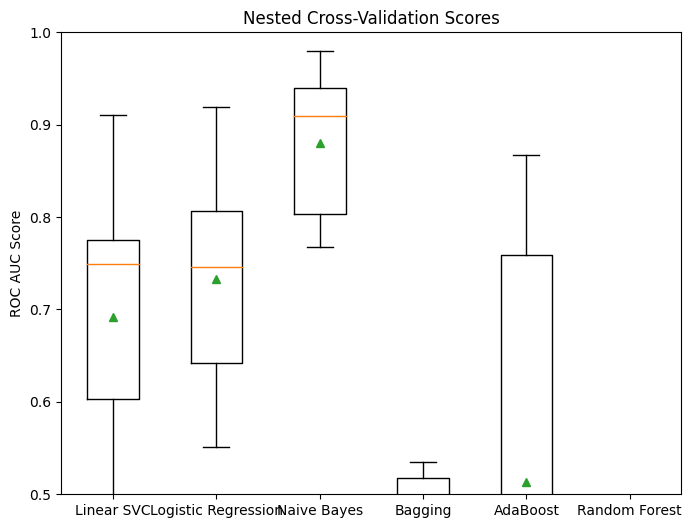

In [21]:
# Plot the cross-validation scores
plt.figure(figsize=(8, 6))
plt.boxplot(list(cv_scores.values()), labels=list(cv_scores.keys()), showmeans=True)
plt.title('Nested Cross-Validation Scores')
plt.ylabel('ROC AUC Score')
plt.ylim(0.5, 1.0)
plt.show()

In [22]:
list(cv_scores.values()),list(cv_scores.keys())

([array([0.91012577, 0.42017017, 0.74944219, 0.60319056, 0.77479156]),
  array([0.9193224 , 0.55162758, 0.74646844, 0.64245811, 0.80672815]),
  array([0.76792228, 0.93943509, 0.97946137, 0.90959901, 0.80310691]),
  array([0.53528726, 0.22556474, 0.31573718, 0.08513735, 0.51771788]),
  array([0.86688877, 0.38139034, 0.37479849, 0.18600415, 0.75906911]),
  array([0.27977012, 0.18000385, 0.17840472, 0.07906378, 0.49532594])],
 ['Linear SVC',
  'Logistic Regression',
  'Naive Bayes',
  'Bagging',
  'AdaBoost',
  'Random Forest'])